Importing Frameworks

In [21]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Device configuration

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print('CUDA is available')

CUDA is available


Hyper Parameters

In [23]:
input_size = 784 # 28x28 image size
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64
hidden_size4 = 32
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

MNIST Dataset

In [24]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

Data Loader

In [25]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Plot the Images

<function matplotlib.pyplot.show(close=None, block=None)>

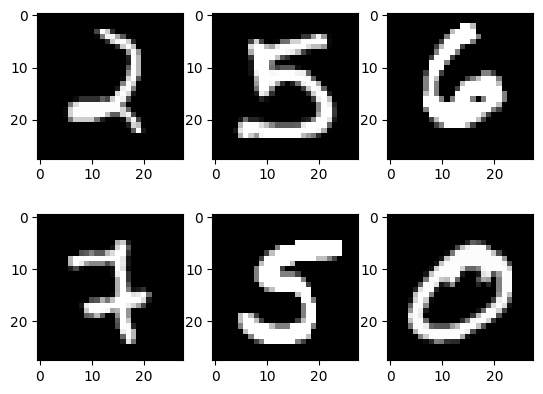

In [26]:
examples = iter(train_loader)
samples, labels = next(examples)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show

Creating the Neural Network

In [27]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.LeakyReLU()
        self.l2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.LeakyReLU()
        self.l3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.LeakyReLU()
        self.l4 = nn.Linear(hidden_size3, hidden_size4)
        self.relu4 = nn.LeakyReLU()
        self.l5 = nn.Linear(hidden_size4, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.l3(out)
        out = self.relu3(out)
        out = self.l4(out)
        out = self.relu4(out)
        out = self.l5(out)
        return out

In [28]:
model = NeuralNet(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, num_classes).to(device)

Loss and Optimizer

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

Training Loop

In [30]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/600], Loss: 0.6293
Epoch [1/10], Step [200/600], Loss: 0.2772
Epoch [1/10], Step [300/600], Loss: 0.3191
Epoch [1/10], Step [400/600], Loss: 0.4017
Epoch [1/10], Step [500/600], Loss: 0.1708
Epoch [1/10], Step [600/600], Loss: 0.1553
Epoch [2/10], Step [100/600], Loss: 0.1122
Epoch [2/10], Step [200/600], Loss: 0.2413
Epoch [2/10], Step [300/600], Loss: 0.1010
Epoch [2/10], Step [400/600], Loss: 0.1607
Epoch [2/10], Step [500/600], Loss: 0.2152
Epoch [2/10], Step [600/600], Loss: 0.0748
Epoch [3/10], Step [100/600], Loss: 0.0425
Epoch [3/10], Step [200/600], Loss: 0.0822
Epoch [3/10], Step [300/600], Loss: 0.0486
Epoch [3/10], Step [400/600], Loss: 0.0633
Epoch [3/10], Step [500/600], Loss: 0.1355
Epoch [3/10], Step [600/600], Loss: 0.1390
Epoch [4/10], Step [100/600], Loss: 0.1587
Epoch [4/10], Step [200/600], Loss: 0.0117
Epoch [4/10], Step [300/600], Loss: 0.0172
Epoch [4/10], Step [400/600], Loss: 0.0522
Epoch [4/10], Step [500/600], Loss: 0.0437
Epoch [4/10

Testing and Evaluation

In [31]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the model on the 10000 test images: 97.81%
